# Moses Permaul - IS362 - Assignment 3
---

### Assignment:
Suppose you've ridden a bicycle from New York City to Key West, Florida. Your bicycle odometer shows the total miles, which you have dutifully logged at the end of each day with paper and pencil. Your first two entries might be 55 and 120, indicating that you rode your bike 55 miles on day 1 and 65 miles on day 2.
1. Your task is to create a pandas Series object that holds the cumulative miles at the end of each day.
2. Then use your Python skills to show the total miles that you rode each day.

### Trip Details:

1. According to Google Maps, a bicycle trip from New York City to Key West, Florida is roughly **1518** miles by bicycle.
<img src="gm_ny_to_kw.jpg" alt="Trip View" title="Google Map NY to KW" width="702" height="341" />


2. According to **Bicycle Touring Pro**, "the average individual conducting a long-distance bicycle tour will cycle **between 40 and 60 miles** each day".
> Alff, D. N.D. Bike Tour Planning: How Far Should You Plan To Cycle Each Day? *Bicycle Touring Pro*. Retrieved from https://bicycletouringpro.com/bike-tour-planning-how-far-should-you-plan-to-cycle-each-day/#:~:text=The%20average%20individual%20conducting%20a,recommended%20for%20most%2

### Specific Details:

1. In order to create an accurate simulation of the miles ridden each day, **a random miles generator will be used to select an INT betwen 40 and 70**. We have decided to use 70 as the max INT in our range instead of 60 as outlined in Alf's article. This 70 takes into account a slightly higher daily miles output where the rider might be an above average rider.  

2. During the random mile generation process, **a 15 mile grace amount will be used to determine if the rider goes over the  randomly generated mile amount**. This simulates a situation where the rider would want to complete the trip without leaving a low amount of miles for the next day.

3. A constant of **1518** will be used as the total trip miles.

#### Grace Amount Example:
> - The remaining miles left is 50 and the randomly generated mile equals 43. The remaining miles left would be 7. Instead of riding 7 miles the next day, since the remaining miles is 15 or less, the rider will complete the trip by riding the 50 miles even though 43 was generated.
> - The remaining miles left is 70 and the randomly generated mile equals 60. The remaining miles left would be 10. Instead of riding 10 miles the next day, the rider will complete the trip by riding the 70 miles even though 60 was generated.

### Python Code for Imports

In [1]:
# import call to random library to retrieve random int function
from random import randint

# matplotlib, numpy, and panda standard imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Enable inline plotting
%matplotlib inline

# Generate Miles Function

In [2]:
def generate_miles(remaining_miles):
    ''' Function that randomly generates the number of miles riden for the day and returns it to caller after
        checks are performed.
    
        Arguments:
            remaining_miles (int): The number of miles left between NY and Key West.
        
        Return:
            miles (int): The randomly generated number of miles ridden for the day.
            remaining_miles (int): The total miles left on the trip.
    '''
    
    # generate a random int between 40 and 60 miles
    miles = randint(40, 70)
  
    # if remaining miles is greater than generated miles and subtraction is greater than grace amount
    if (remaining_miles > miles) and (remaining_miles - miles) > 15:
        return miles
    
    # if remaining miles is greater than generated miles and subtraction is less than grace amount
    elif (remaining_miles > miles) and (remaining_miles - miles) <= 15:
        return remaining_miles
    
    # return remaining miles for every other case
    else:
        return remaining_miles

### Main Code To Generate Miles and Store in Lists

In [3]:
# constant used for the total miles to travel
total_miles = 1518

# variable to store value for how many mles completed
miles_completed = 0

# variable to store the day count, initialized to 1
day_count = 1

# dictionary to store miles and days for later use with a pandas series objects
logged_miles = {}

# loop to generate miles riden each day
while miles_completed < total_miles:
    
    # call generator and pass in the results of total miles minus miles completed
    miles = generate_miles(total_miles - miles_completed)
   
    # add entry to dictionary
    logged_miles[f'Day {day_count}'] = miles
      
    # update day count and miles completed values
    day_count += 1
    miles_completed += miles

### Pandas Code - Building Series Objects from the Populated Lists

In [4]:
# pandas series object storing the daily miles riden each day
daily_log = pd.Series(logged_miles)

# pandas series object simulating the odometer readings at the end of each day
odometer = daily_log.cumsum()

### Viewing the Cumulative Miles at the End of Each Day

In [5]:
print(odometer)

Day 1       40
Day 2       99
Day 3      160
Day 4      206
Day 5      260
Day 6      312
Day 7      352
Day 8      399
Day 9      466
Day 10     533
Day 11     602
Day 12     662
Day 13     713
Day 14     756
Day 15     816
Day 16     860
Day 17     921
Day 18     970
Day 19    1022
Day 20    1081
Day 21    1131
Day 22    1173
Day 23    1216
Day 24    1272
Day 25    1316
Day 26    1367
Day 27    1418
Day 28    1483
Day 29    1518
dtype: int64


### Viewing the Total Miles Riden Each Day

In [6]:
print(daily_log)

Day 1     40
Day 2     59
Day 3     61
Day 4     46
Day 5     54
Day 6     52
Day 7     40
Day 8     47
Day 9     67
Day 10    67
Day 11    69
Day 12    60
Day 13    51
Day 14    43
Day 15    60
Day 16    44
Day 17    61
Day 18    49
Day 19    52
Day 20    59
Day 21    50
Day 22    42
Day 23    43
Day 24    56
Day 25    44
Day 26    51
Day 27    51
Day 28    65
Day 29    35
dtype: int64


### Visualizing the Total Miles Ridden Each 

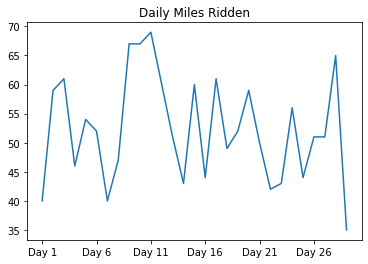

In [7]:
daily_log.plot(title='Daily Miles Ridden');